In [2]:
!pip install pyathena

  Using cached pyathena-3.3.0-py3-none-any.whl.metadata (86 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl.metadata (6.6 kB)
Using cached pyathena-3.3.0-py3-none-any.whl (80 kB)
Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.1.0
    Uninstalling urllib3-2.1.0:
      Successfully uninstalled urllib3-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.4 which is incompatible.
sagemaker 2.199.0 requires urllib3<1.27, but you have urllib3 2.0.7 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [44]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [17]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name1 = 'viamericas'
database_name2 = 'analytics'
tabla1 = 'tb2_fraud_jp'
tabla2 = 'tb_fraud_jp'

In [31]:
#Connection

conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla1};', conn)
df2 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla2};', conn)

/tmp/ipykernel_20/2343750790.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla1};', conn)
/tmp/ipykernel_20/2343750790.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla2};', conn)


In [32]:
df2.was_fraud.value_counts()

was_fraud
True     1726
False     142
Name: count, dtype: int64

In [33]:
df1.head()

,date_receiver,id_receiver,id_branch,fraud_type,id_sender,id_country_receiver,id_payment,id_state_receiver,id_city_receiver,bank_receiver,score,was_fraud,date_created,date_processed
0,2022-02-02 17:40:09.473,5761.0,A06763,Remote Access,1091.0,MEX,C,MEX43,ME500,,NaN,True,2023-01-25 15:54:56.097,NaT
1,2022-02-23 16:50:02.520,1347.0,A21266,Remote Access,126.0,ELS,C,ELS13,ELS14,,0.740618,True,2023-01-25 15:55:30.333,2023-02-08 19:45:48.080
2,2022-03-04 17:59:36.560,25962.0,A14741,Remote Access,3279.0,MEX,C,MEX16,ME379,,1.000000,True,2023-01-25 15:54:16.353,2023-03-03 20:24:58.507
3,2022-03-08 20:10:35.857,8467.0,A18709,Remote Access,2933.0,HON,C,HON06,HN052,,0.751378,True,2023-01-25 15:54:36.097,2023-02-07 22:42:58.523
4,2022-03-15 15:34:41.813,216.0,A21948,Remote Access,113.0,ELS,C,ELS02,SV137,,0.877270,True,2023-01-25 15:54:48.887,2023-02-07 14:56:31.253


In [49]:
print(sns.__version__)

0.11.2


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


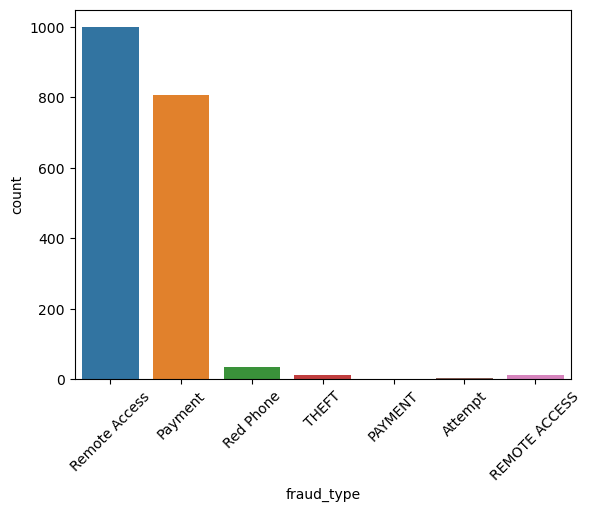

In [53]:
sns.countplot(data=df1, x = 'fraud_type')
plt.xticks(rotation=45);

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


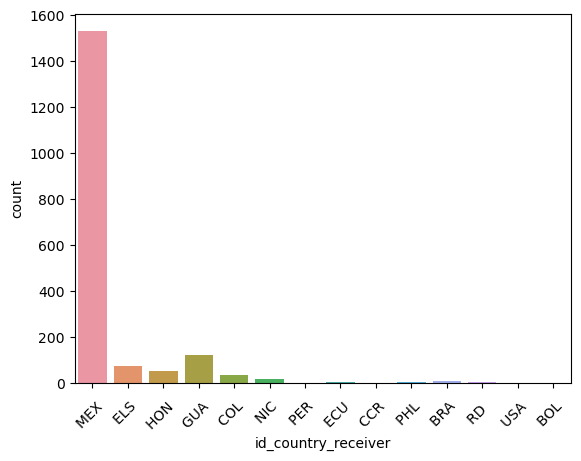

In [52]:
sns.countplot(data=df1, x = 'id_country_receiver')
plt.xticks(rotation=45);

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


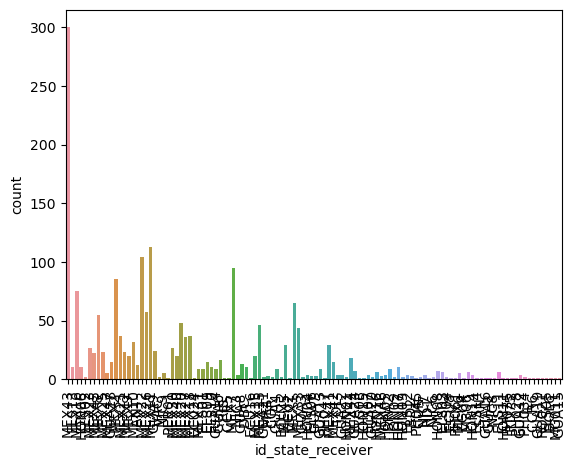

In [59]:
sns.countplot(data=df1, x = 'id_state_receiver')
plt.xticks(rotation=90);

In [72]:
df1.loc['date_receiver'] = pd.to_datetime(df1['date_receiver'])
df1['dia_semana'] = df1['date_receiver'].dt.weekday


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='dia_semana', ylabel='count'>

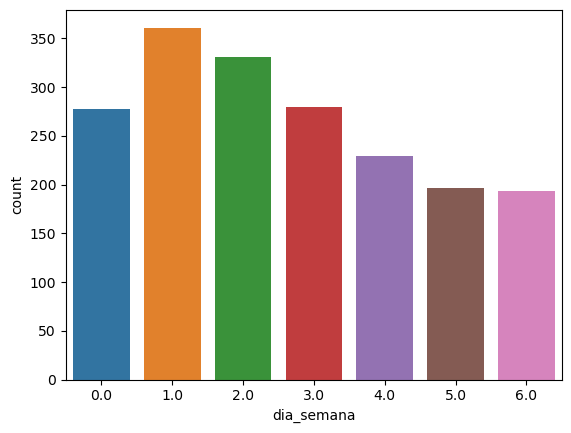

In [76]:
sns.countplot(data=df1, x = 'dia_semana')

In [87]:
df1['hora'].value_counts()

hora
16.0    259
17.0    254
15.0    238
18.0    203
14.0    195
19.0    177
20.0    141
13.0    103
21.0     93
12.0     69
22.0     37
11.0     34
23.0     27
10.0     18
9.0      13
8.0       5
3.0       2
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='hora', ylabel='count'>

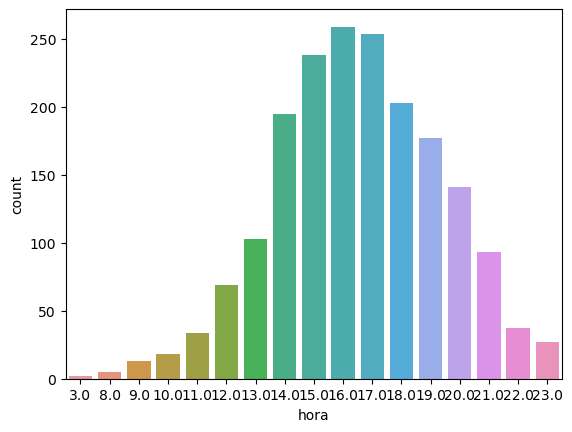

In [86]:
df1['hora'] =  df1['date_receiver'].dt.hour
sns.countplot(data=df1, x = 'hora')

In [56]:
df1.id_payment.value_counts()

id_payment
C     1868
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='was_fraud', ylabel='score'>

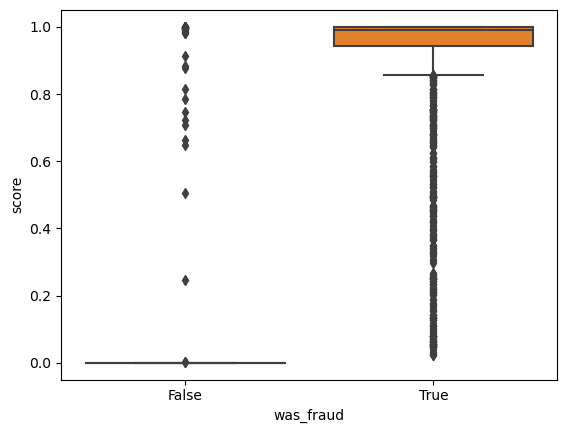

In [30]:
sns.boxplot(data=df1, y='score', x ='was_fraud')